In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os, gzip
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [3]:
DATASET = 'karate'

In [4]:
!python3 deepwalk.py --emb-dim 2 --input data/karate.edgelist.gz --output embs/karate_DeepWalk_2dims.txt.gz

Generating walks (CPU: 1): 100%|██████████████| 20/20 [00:00<00:00, 2771.17it/s]
Training
Dumping the DeepWalk embeddings


In [5]:
!python3 deepwalk.py --emb-dim 4 --input data/karate.edgelist.gz --output embs/karate_DeepWalk_4dims.txt.gz

Generating walks (CPU: 1): 100%|██████████████| 20/20 [00:00<00:00, 2768.24it/s]
Training
Dumping the DeepWalk embeddings


In [6]:
!python3 deepwalk.py --emb-dim 8 --input data/karate.edgelist.gz --output embs/karate_DeepWalk_8dims.txt.gz

Generating walks (CPU: 1): 100%|██████████████| 20/20 [00:00<00:00, 2668.47it/s]
Training
Dumping the DeepWalk embeddings


In [7]:
import networkx as nx

graph = nx.read_weighted_edgelist(f'data/{DATASET}.edgelist.gz')
graph.remove_edges_from(nx.selfloop_edges(graph))
node_name = np.array(list(graph.nodes()))
node_dict = dict(zip(node_name, np.arange(len(node_name))))

In [9]:
import community as community_louvain

community_dict = community_louvain.best_partition(graph, resolution=1, random_state=11)
edge_communities = np.array(['-'.join(map(str, sorted([community_dict[i], community_dict[j]]))) for i,j in graph.edges()])

/Users/sreeparnadeb/REIT/NetAudit/netaudit_updated/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


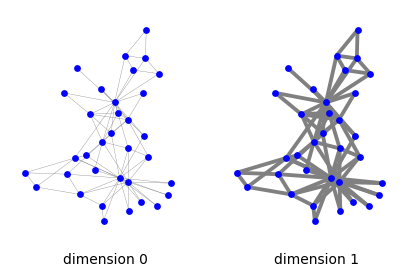

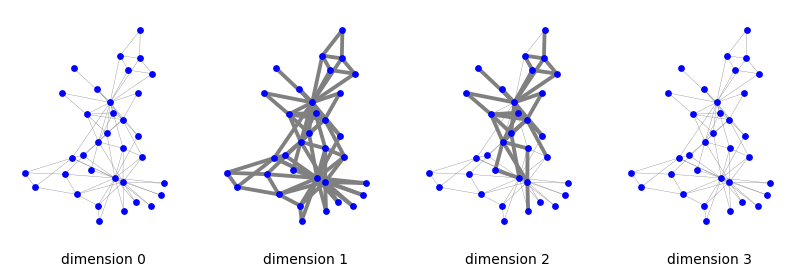

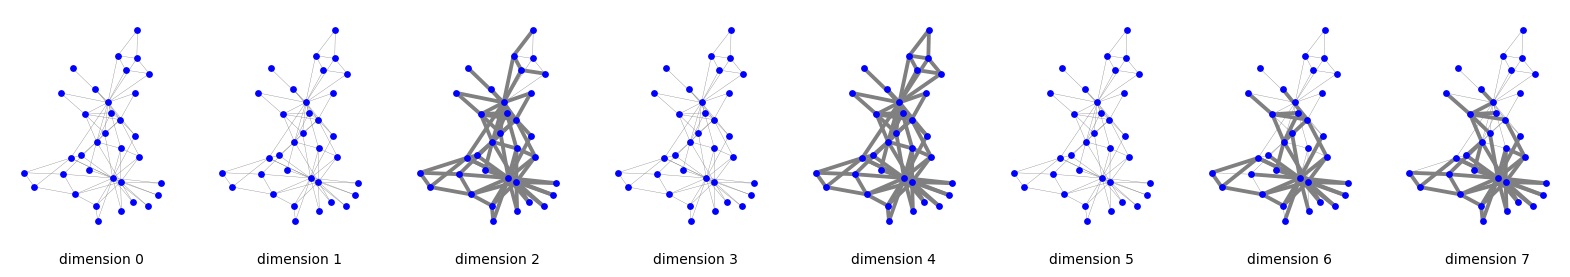

In [10]:
import utils

for D_out in [2,4,8]:
    
    emb_dict = utils.load_embs(f'embs/{DATASET}_DeepWalk_{D_out}dims.txt.gz')
    emb_X = np.array([emb_dict[n] for n in node_name]) 

    i_dims, i_masks, i_labels, i_scores, i_entropies = utils.edge_interpretability_parallel(graph, emb_X,  
                                                                                        edge_communities)

    fig, ax = plt.subplots(1, D_out, figsize=(2.5*D_out,3))

    ax = ax.ravel()

    for axx in ax:
        axx.axis('off')

    pos=nx.spring_layout(graph, seed=8)

    THRESH = 1e-9

    for dim in range(D_out):

        color = i_masks[dim]
        vmin = min(color)
        vmax = max(color)

        nx.draw(graph, pos, node_color='b', edge_color='grey', width=(color>THRESH)*2.5+ 0.25, node_size=15,
                   with_labels=False, vmin=vmin, vmax=vmax, ax=ax[dim])

        ax[dim].text(x=0.3, y=-0.1, s='dimension '+str(dim), transform=ax[dim].transAxes, fontsize=10)